# Human Action Recognition using Inertial Sensor  Data of Smartwatch/Wearable Device


# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from scipy import stats
from sklearn import metrics
import glob
import csv
import os
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Check if GPU is available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
    
interesting_dir = "./Fastest/"
interesting_labels = ['stand', 'walk','jump','fall']
save_filename = "activity"

C:\Users\farha\anaconda3\envs\tensorflow_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\farha\anaconda3\envs\tensorflow_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\farha\anaconda3\envs\tensorflow_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\farha\anaconda3\envs\tensorflow_gpu\l

Default GPU Device: /device:GPU:0


# Concate and label the raw data  

In [7]:
def data_concate_label(path,label):
    all_files1 = glob.glob(path + "/*.csv")
    
    li = []

    for filename in all_files1:
        df = pd.read_csv(filename, index_col=None, header=0)
        
        if 'label' in df.columns:
            pass
        else:df['label'] = str(label)
        li.append(df)
    frame = pd.concat(li, axis=0, ignore_index=True)
    frame = frame[:16000]
    
    print(frame.shape)
    print(len(df.columns))
    frame.to_csv("./Fastest/activity_"+str(label)+".csv",index = False)
    

In [8]:
path1 = r".\Fastest\stand"
label1 = "stand"
path2 = r".\Fastest\walk_new"
label2 = "walk"
path3 = r".\Fastest\jump_new"
label3 = "jump"
path4 = r".\Fastest\Fall"
label4 = "fall"
data_concate_label(path1,label1)
data_concate_label(path2,label2)
data_concate_label(path3,label3)
data_concate_label(path4,label4)

(16000, 11)
11
(16000, 11)
11
(16000, 11)
11
(16000, 11)
11


# Concate all data into one .csv file

In [10]:
import copy

df = pd.DataFrame()
for i in range(len(interesting_labels)):
    df_tmp = pd.read_csv(interesting_dir+save_filename+"_"+interesting_labels[i]+'.csv',header = 0)
    df = pd.concat([df, df_tmp])
    
print(len(df.columns))
drop_list = ['DATE','TIME']
df = df.drop(drop_list, axis=1)
df = df.dropna()

all_data_filename = "total.csv"
df.to_csv(interesting_dir+all_data_filename)
print(df)


11
             ax        ay        az        gx        gy        gz         ma  \
0      9.592826  2.708675  0.942772 -0.007327  0.045181 -0.400524  10.012395   
1      9.592826  2.708675  0.942772 -0.050066  0.036633 -0.433494  10.012395   
2      9.463613  2.718246  0.942772 -0.050066  0.036633 -0.433494   9.891292   
3      9.463613  2.718246  0.942772 -0.051287  0.026864 -0.417620   9.891292   
4      9.348758  2.675176  0.978664 -0.051287  0.026864 -0.417620   9.773107   
...         ...       ...       ...       ...       ...       ...        ...   
15995 -1.533799  0.641277  8.563912  0.768079 -0.536068  0.829134   8.723782   
15996 -1.469193  0.636491  8.702696  0.768079 -0.536068  0.829134   8.848761   
15997 -1.469193  0.636491  8.702696  0.638641 -0.700918  0.799828   8.848761   
15998 -1.227518  0.701097  8.896515  0.638641 -0.700918  0.799828   9.008125   
15999 -1.227518  0.701097  8.896515  0.446927 -0.732667  0.736330   9.008125   

             mg  label  
0      0.40

In [21]:

print(df.info())
print(df.max())
print(df.min()) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64000 entries, 0 to 15999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ax      64000 non-null  float64
 1   ay      64000 non-null  float64
 2   az      64000 non-null  float64
 3   gx      64000 non-null  float64
 4   gy      64000 non-null  float64
 5   gz      64000 non-null  float64
 6   ma      64000 non-null  float64
 7   mg      64000 non-null  float64
 8   label   64000 non-null  object 
dtypes: float64(8), object(1)
memory usage: 4.9+ MB
None
ax       72.4044
ay       61.5123
az       72.3829
gx       22.0411
gy       27.9573
gz       13.0305
ma       106.487
mg       38.7735
label       walk
dtype: object
ax         -71.129
ay        -65.8888
az        -73.3424
gx        -13.2088
gy        -36.9435
gz        -17.7073
ma       0.0662254
mg       0.0029911
label         fall
dtype: object


# Feature correlation (optional)

In [36]:
# use deepcopy to avoid other operation change value of df
df_cor = copy.deepcopy(df) 

features = df_cor.columns[0:-1]
df_cor["label"] = pd.factorize(df_cor.label)[0]
traindf = pd.DataFrame(df_cor,columns=features)

feature_name = list(traindf.columns)
print(feature_name)
y = df_cor['label']
X = traindf.copy()
X.isna().sum()

['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'ma', 'mg']


ax    0
ay    0
az    0
gx    0
gy    0
gz    0
ma    0
mg    0
dtype: int64

[0.15157847 0.15485937 0.16514362 0.08006328 0.0977846  0.13294023
 0.08387631 0.13375412]


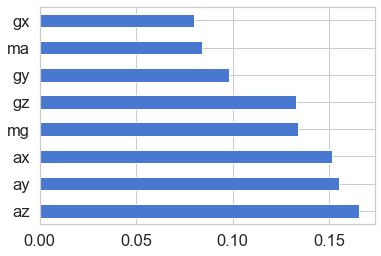

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [38]:
df_plot = copy.deepcopy(df)
df_plot.reset_index(inplace = True) 


# Human Action Sensor Data Visualization

       index         ax        ay         az        gx        gy        gz  \
33000   1000   8.128419 -1.289731   5.388637 -0.014653  0.008548 -0.006106   
33001   1001   8.102098 -1.256232   5.347959 -0.014653  0.008548 -0.006106   
33002   1002   8.102098 -1.256232   5.347959 -0.021980  0.007327 -0.007327   
33003   1003   8.116454 -1.256232   5.359923 -0.021980  0.007327 -0.007327   
33004   1004   8.116454 -1.256232   5.359923 -0.029307  0.007327 -0.014653   
...      ...        ...       ...        ...       ...       ...       ...   
35995   3995  11.947364 -0.117248  10.401600 -0.545837 -1.560580  0.023201   
35996   3996  11.696117 -0.157926  10.399207 -0.545837 -1.560580  0.023201   
35997   3997  11.696117 -0.157926  10.399207 -0.750983 -1.300483  0.072046   
35998   3998  11.583654 -0.390030  10.454242 -0.750983 -1.300483  0.072046   
35999   3999  11.583654 -0.390030  10.454242 -0.935371 -1.025733  0.119669   

              ma        mg label  
33000   9.837276  0.018029  

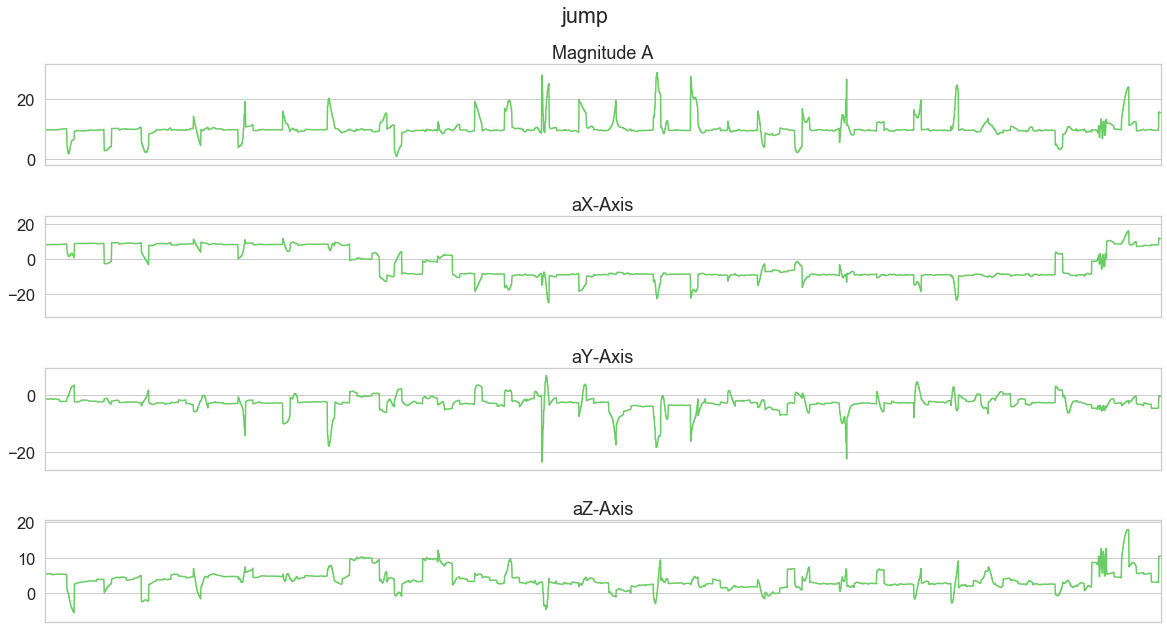

      index        ax        ay        az        gx        gy        gz  \
1000   1000  9.760324  0.236889  1.165305 -0.003663  0.014653 -0.017096   
1001   1001  9.786645  0.200997  1.189233 -0.003663  0.014653 -0.017096   
1002   1002  9.786645  0.200997  1.189233 -0.006106  0.019538 -0.018317   
1003   1003  9.743574  0.215354  1.162912 -0.006106  0.019538 -0.018317   
1004   1004  9.743574  0.215354  1.162912 -0.006106  0.019538 -0.021980   
...     ...       ...       ...       ...       ...       ...       ...   
3995   3995  9.104691 -1.158126  4.106084 -0.186830  0.157523  0.035412   
3996   3996  9.104691 -1.158126  4.106084 -0.222242  0.166071  0.037854   
3997   3997  9.126225 -1.071984  4.043870 -0.222242  0.166071  0.037854   
3998   3998  9.126225 -1.071984  4.043870 -0.273529  0.186830  0.043960   
3999   3999  9.109476 -1.055235  4.029513 -0.273529  0.186830  0.043960   

             ma        mg  label  
1000   9.832495  0.022812  stand  
1001   9.860684  0.022812  st

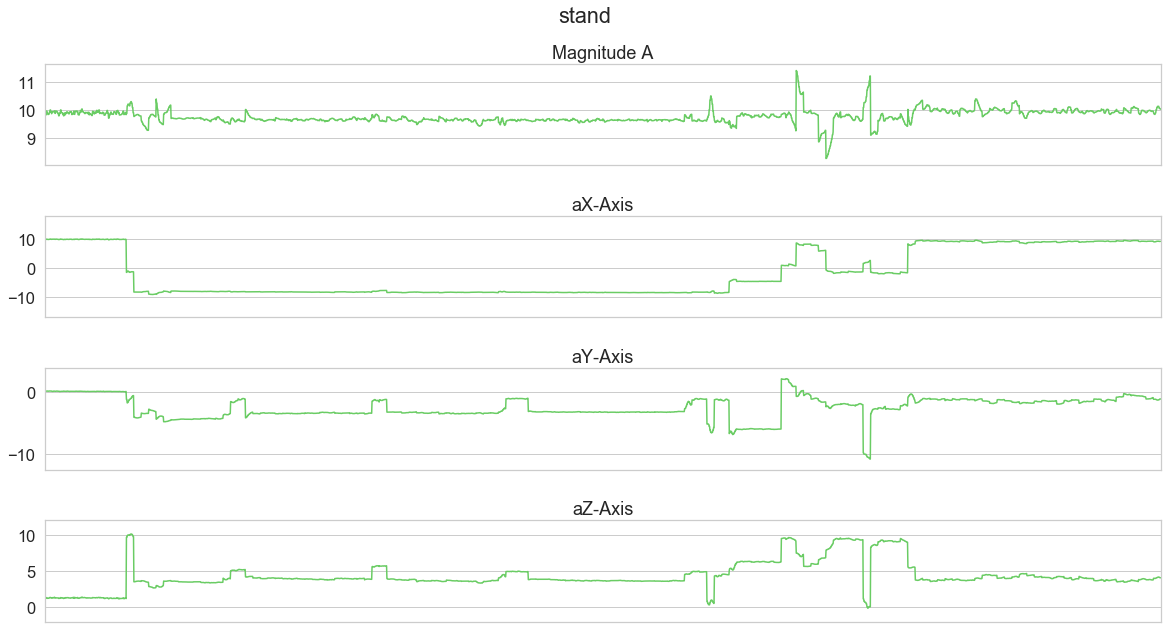

       index        ax        ay        az        gx        gy        gz  \
49000   1000  2.383251 -3.280560  5.084748  0.929266 -2.107638 -0.898738   
49001   1001  2.828317 -2.837888  4.445865  0.929266 -2.107638 -0.898738   
49002   1002  2.828317 -2.837888  4.445865  0.832798 -2.018497 -0.824250   
49003   1003  3.206382 -2.565106  4.098905  0.832798 -2.018497 -0.824250   
49004   1004  3.206382 -2.565106  4.098905  0.769300 -1.925692 -0.737551   
...      ...       ...       ...       ...       ...       ...       ...   
51995   3995  8.769695 -1.313660  3.326024 -0.024422  0.114784  0.037854   
51996   3996  8.769695 -1.313660  3.326024 -0.003663  0.102573  0.045181   
51997   3997  8.946764 -1.610370  3.522235 -0.003663  0.102573  0.045181   
51998   3998  8.946764 -1.610370  3.522235  0.037854  0.103794  0.028086   
51999   3999  9.255438 -1.672583  3.503092  0.037854  0.103794  0.028086   

              ma        mg label  
49000   6.503586  2.472529  fall  
49001   5.984872 

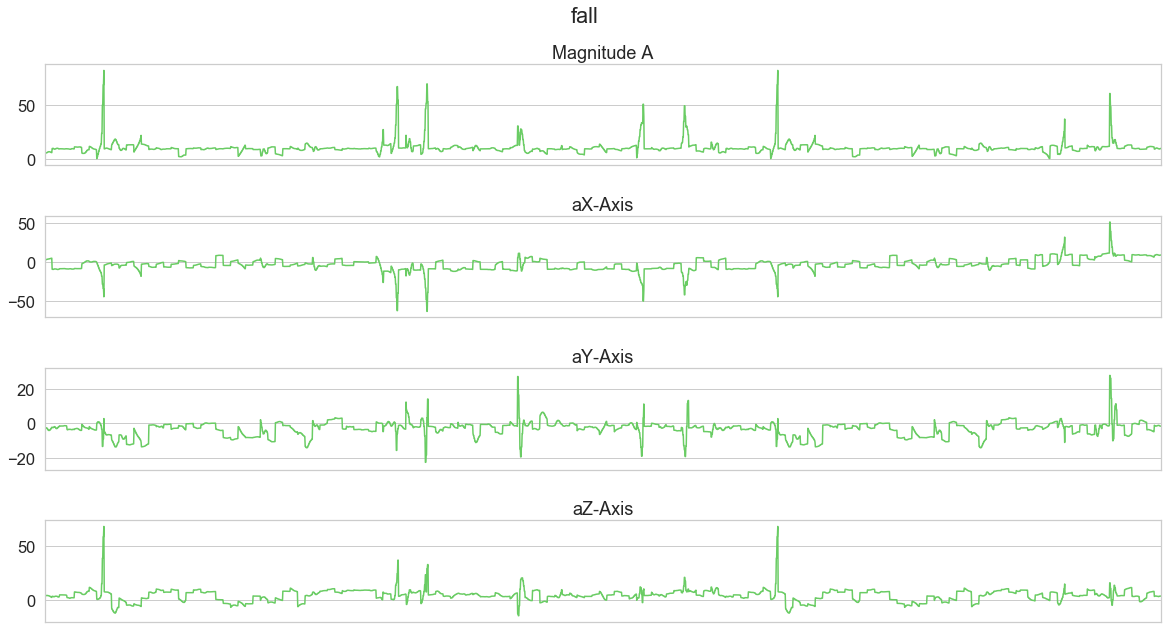

       index         ax        ay        az        gx        gy        gz  \
17000   1000  -8.027920 -2.713461  3.936193 -0.039076  0.089141  0.136764   
17001   1001  -8.013563 -2.713461  3.945765 -0.039076  0.089141  0.136764   
17002   1002  -8.013563 -2.713461  3.945765 -0.031749  0.090362  0.201483   
17003   1003  -8.032705 -2.758925  3.960121 -0.031749  0.090362  0.201483   
17004   1004  -8.032705 -2.758925  3.960121 -0.025643  0.096468  0.250328   
...      ...        ...       ...       ...       ...       ...       ...   
19995   3995   9.083155 -2.522035  4.608576  1.254081 -1.652163 -2.147934   
19996   3996   9.836894 -2.419144  4.682754  1.254081 -1.652163 -2.147934   
19997   3997   9.836894 -2.419144  4.682754  1.317579 -1.681470 -2.147934   
19998   3998  10.631311 -2.301895  4.756931  1.317579 -1.681470 -2.147934   
19999   3999  10.631311 -2.301895  4.756931  1.322463 -1.663153 -2.147934   

              ma        mg label  
17000   9.343660  0.167862  walk  
17001

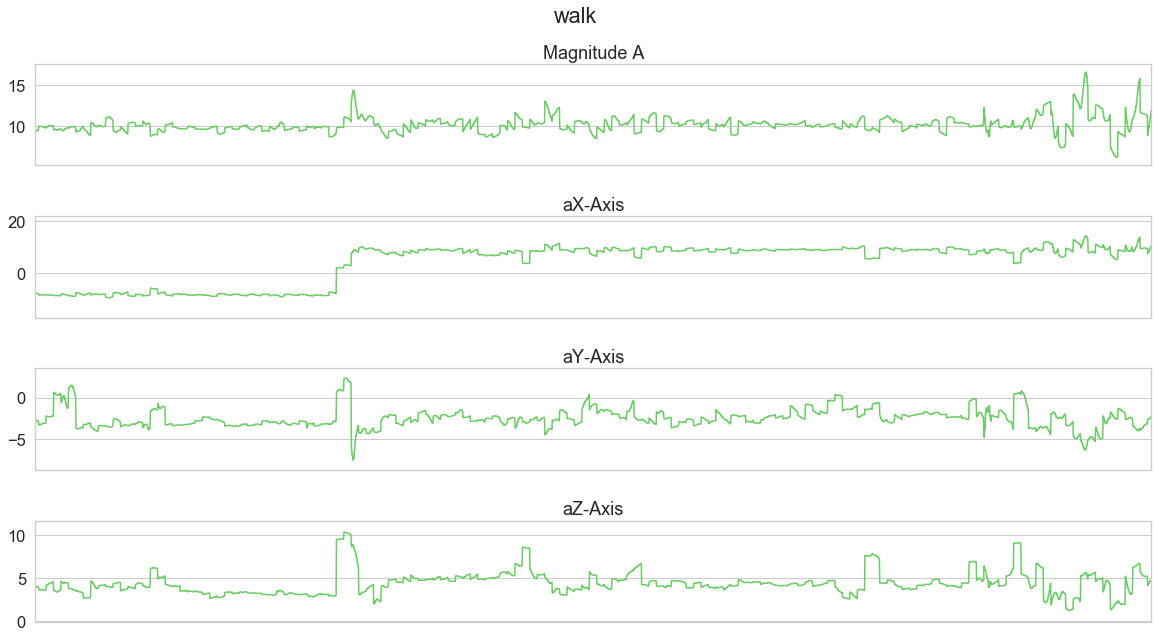

In [40]:
activities = df_plot['label'].value_counts().index
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2,ax3) = plt.subplots(nrows=4, figsize=(20, 10), sharex=True)
    plot_axis(ax0, data['index'], data['ma'], 'Magnitude Accelerometer')
    plot_axis(ax1, data['index'], data['ax'], 'aX-Axis')
    plot_axis(ax2, data['index'], data['ay'], 'aY-Axis')
    plot_axis(ax3, data['index'], data['az'], 'aZ-Axis')
    plt.subplots_adjust(hspace=0.5)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    
for activity in activities:
    data_for_plot = df_plot[(df_plot['label'] == activity)][1000:4000]
    print(data_for_plot)
    print(activity)
    plot_activity(activity, data_for_plot)

# Split training and testing data

In [41]:
def train_test_split(label, ratio):
    split_point = int(len(df[df.label == label]) * ratio)
    return (df[df.label == label].iloc[:split_point, :], df[df.label == label].iloc[split_point:, :])

split_ratio = 0.8
train_data = pd.DataFrame([])
test_data = pd.DataFrame([])

for i in range(len(interesting_labels)):
    (train, test) = train_test_split(interesting_labels[i], split_ratio)
    train_data = pd.concat([train_data, train])
    test_data = pd.concat([test_data, test])

print("Number of train samples: ", len(train_data))
print("Number of test samples: ", len(test_data))


train_label = train_data['label'].to_frame()
test_label = test_data['label'].to_frame()

Number of train samples:  51200
Number of test samples:  12800


# Data Segmentation (Sliding Window)

In [54]:
N_TIME_STEPS = 120 #sliding window length
STEP = 20 #Sliding window step size -->this is based on our sampling rate in dataset 
N_FEATURES = 8

def generate_sequence(x, y, n_time_steps, step):
    
    segments = []
    labels = []
    for i in range(0, len(x) - n_time_steps, step):
        ax = x['ax'].values[i: i + n_time_steps]
        ay = x['ay'].values[i: i + n_time_steps]
        az = x['az'].values[i: i + n_time_steps]

        gx = x['gx'].values[i: i + n_time_steps]
        gy = x['gy'].values[i: i + n_time_steps]
        gz = x['gz'].values[i: i + n_time_steps]
        ma =  x['ma'].values[i: i + n_time_steps]
        mg =  x['mg'].values[i: i + n_time_steps]
                
       
        label = stats.mode(y['label'][i: i + n_time_steps])[0][0]
        segments.append([ax, ay, az, gx, gy, gz, ma, mg])
        labels.append(label)
        
    return segments, labels

train_X, train_y = generate_sequence(train_data, train_label, N_TIME_STEPS, STEP)
test_X, test_y = generate_sequence(test_data, test_label, N_TIME_STEPS, STEP)

In [55]:
# reshape input segments and one-hot encode labels
def reshape_segments(x, y, n_time_steps, n_features):
    
    x_reshaped = np.asarray(x, dtype= np.float32).reshape(-1, n_time_steps, n_features)
    y_reshaped = np.asarray(pd.get_dummies(y), dtype = np.float32)
    return x_reshaped, y_reshaped

X_train, y_train = reshape_segments(train_X, train_y, N_TIME_STEPS, N_FEATURES)
X_test, y_test = reshape_segments(test_X, test_y, N_TIME_STEPS, N_FEATURES)

In [56]:
print(y_test)

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

# Import DL Library

In [57]:
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, Bidirectional
from tensorflow.keras.layers import Attention
from keras.layers import Dropout
from keras import optimizers
from keras import backend as K

N_CLASSES = 4
N_HIDDEN_UNITS = 64
L2 = 0.000001

# LSTM Model (Training) 

In [58]:
# LSTM model
from keras.backend import clear_session

clear_session()
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(N_TIME_STEPS, N_FEATURES), 
         kernel_initializer='orthogonal', kernel_regularizer=l2(L2), recurrent_regularizer=l2(L2),
         bias_regularizer=l2(L2), name="LSTM_1"))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Flatten(name='Flatten'))
model.add(Dense(N_HIDDEN_UNITS, activation='relu', kernel_regularizer=l2(L2), bias_regularizer=l2(L2), name="Dense_1"))
model.add(Dense(N_CLASSES, activation='softmax', kernel_regularizer=l2(L2), bias_regularizer=l2(L2), name="Dense_2"))

model.summary()

opt = optimizers.RMSprop(lr=0.0001)

model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['mae'])

BATCH_SIZE =64
N_EPOCHS = 20

lstm = model.fit(X_train, y_train,
          batch_size=BATCH_SIZE, epochs=N_EPOCHS,
          validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LSTM_1 (LSTM)                (None, 120, 64)           18688     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 120, 64)           24832     
_________________________________________________________________
Flatten (Flatten)            (None, 7680)              0         
_________________________________________________________________
Dense_1 (Dense)              (None, 64)                491584    
_________________________________________________________________
Dense_2 (Dense)              (None, 4)                 260       
Total params: 535,364
Trainable params: 535,364
Non-trainable params: 0
_________________________________________________________________
Train on 2554 samples, validate on 634 samples
Epoch 1/20
2554/2554 [==============================] - 15s 6ms/step - loss: 0.9446 - mea

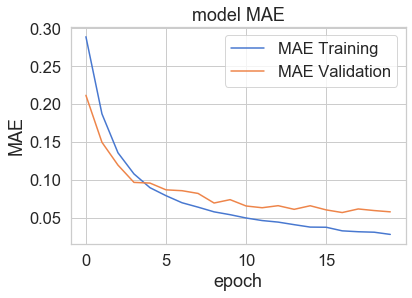

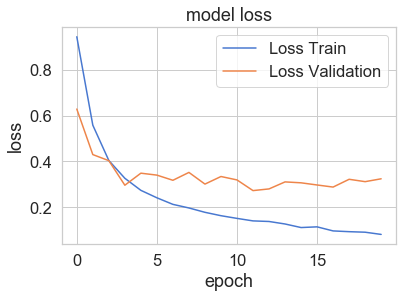

In [59]:
plt.plot(lstm.history['mean_absolute_error'])
plt.plot(lstm.history['val_mean_absolute_error'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['MAE Training', 'MAE Validation'], loc='best')
plt.show()

plt.plot(lstm.history['loss'])
plt.plot(lstm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Loss Train', 'Loss Validation'], loc='best')
plt.show()